# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [83]:
dados = pd.read_csv(r'C:\Users\User\Desktop\ALURA\Estatística com Python\dados.csv')

dados.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1.2 Tipos de dados</font>
***

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [84]:
# 
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [85]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [86]:
sorted(dados['Sexo'].unique())

[0, 1]

In [87]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [88]:
dados.Idade.min()

13

In [89]:
print('De %s até %s anos' % (dados.Idade.min(), dados.Idade.max()))

De 13 até 99 anos


#### <font color='red'>Observação</font>
***
> A variável idade pode ser classificada de três formas distintas:
> 1. <b>QUANTITATIVA DISCRETA</b> - quando representa anos completos (números inteiros);
> 2. <b>QUANTITATIVA CONTÍNUA</b> - quando representa a idade exata, sendo representado por frações de anos; e
> 3. <b>QUALITATIVA ORDINAL</b> - quando representa faixas de idade.



### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [90]:
print('De %s até %s metros' % (dados.Altura.min(), dados.Altura.max()))

De 1.339244614 até 2.028496765 metros


### Classificação de uma variável
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='20%'>

# <font color=green>2 DISTRIBUIÇÃO DE FREQUÊNCIAS</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [91]:
# Contagem de valores
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [92]:
# Porcentagem de valores 
dados['Sexo'].value_counts(normalize = True) *  100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [93]:
# Contagem de valores em uma variavel
frequencia = dados['Sexo'].value_counts()

In [94]:
# Porcentagem de valores em uma variavel
percentual = dados['Sexo'].value_counts(normalize = True) *  100

In [95]:
# Tabela de frequência em uma nova variavel:
dist_freq_qualitativa = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': percentual})

In [96]:

dist_freq_qualitativa

,Frequencia,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [97]:
# Renomeando os índices:
dist_freq_qualitativa.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)

# Renomeando o nome da coluna:
dist_freq_qualitativa.rename_axis('Sexo', axis='columns', inplace=True)

In [98]:
dist_freq_qualitativa

Sexo,Frequencia,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [99]:
# Dicionarios para renomear os indices
Sexo = {0: 'Maculino', 1: 'Feminino'}

Cor = {0: 'Indigina', 1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Sem declaração'}

In [100]:
# Tabela de frequência cruzada
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)

# Renomeando os índices e colunas:
frequencia.rename(index=Sexo, inplace=True)
frequencia.rename(columns=Cor, inplace=True)

frequencia

Cor,Indigina,Preta,Parda,6,8
Sexo,,,,,
Maculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [101]:
# Tabela de frequência cruzada
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize= True) * 100

# Renomeando os índices e colunas:
percentual.rename(index=Sexo, inplace=True)
percentual.rename(columns=Cor, inplace=True)

percentual

Cor,Indigina,Preta,Parda,6,8
Sexo,,,,,
Maculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [102]:
# Tabelas de frequncia cruzadas com valores agregados
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc ='mean',
                         values = dados.Renda) 

# Renomeando os índices e colunas:
percentual.rename(index=Sexo, inplace=True)
percentual.rename(columns=Cor, inplace=True)

percentual

Cor,Indigina,Preta,Parda,6,8
Sexo,,,,,
Maculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


In [103]:
dados.Renda.min()

0

In [104]:
dados.Renda.max()

200000

In [105]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [106]:
labels = ['E', 'D', 'C', 'B', 'A']

### Passo 2 - Criar a tabela de frequências

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [107]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [108]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [109]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True),
    normalize=True
).round(2)
percentual

E    0.65
D    0.22
C    0.10
B    0.03
A    0.01
Name: Renda, dtype: float64

In [110]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,608,0.01
B,2178,0.03
C,7599,0.10
D,16700,0.22
E,49755,0.65


## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [111]:
import numpy as np 

### Passo 1 - Difinindo o número de classes

#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

Abaixo está a formula

In [112]:
# n é o número de observações
n = dados.shape[0]
n

76840

In [113]:
# k é o número de classes
k = 1 + (10/3) * np.log10(n)
k

17.285291187298853

In [114]:
# arrendondando o valor de k para o inteiro mais próximo
k = int(k.round(0))
k

17

### Passo 2 - Criar a tabela de frequências

In [115]:
# Número de classes segundo a regra de Sturges

frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = 17,
           include_lowest = True
    ),
    sort = False
)
frequencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [116]:
# 
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = 17,
           include_lowest = True
    ),
    sort = False,
    normalize = True
).round(2)
percentual

(-200.001, 11764.706]       0.98
(11764.706, 23529.412]      0.01
(23529.412, 35294.118]      0.00
(35294.118, 47058.824]      0.00
(47058.824, 58823.529]      0.00
(58823.529, 70588.235]      0.00
(70588.235, 82352.941]      0.00
(82352.941, 94117.647]      0.00
(94117.647, 105882.353]     0.00
(105882.353, 117647.059]    0.00
(117647.059, 129411.765]    0.00
(129411.765, 141176.471]    0.00
(141176.471, 152941.176]    0.00
(152941.176, 164705.882]    0.00
(164705.882, 176470.588]    0.00
(176470.588, 188235.294]    0.00
(188235.294, 200000.0]      0.00
Name: Renda, dtype: float64

In [117]:
# Tabela de frequência com amplitude de classe fixa
dist_freq_quantitativas_amplitute_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_amplitute_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.98
"(11764.706, 23529.412]",1022,0.01
"(23529.412, 35294.118]",169,0.00
"(35294.118, 47058.824]",19,0.00
"(47058.824, 58823.529]",16,0.00
"(58823.529, 70588.235]",5,0.00
"(70588.235, 82352.941]",4,0.00
"(82352.941, 94117.647]",1,0.00
"(94117.647, 105882.353]",6,0.00
"(105882.353, 117647.059]",0,0.00


## <font color=green>2.4 Histograma</font>
***

O <b>HISTOGRAMA</b> é a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

### Importando a biblioteca

https://seaborn.pydata.org/

In [118]:
import seaborn as sns

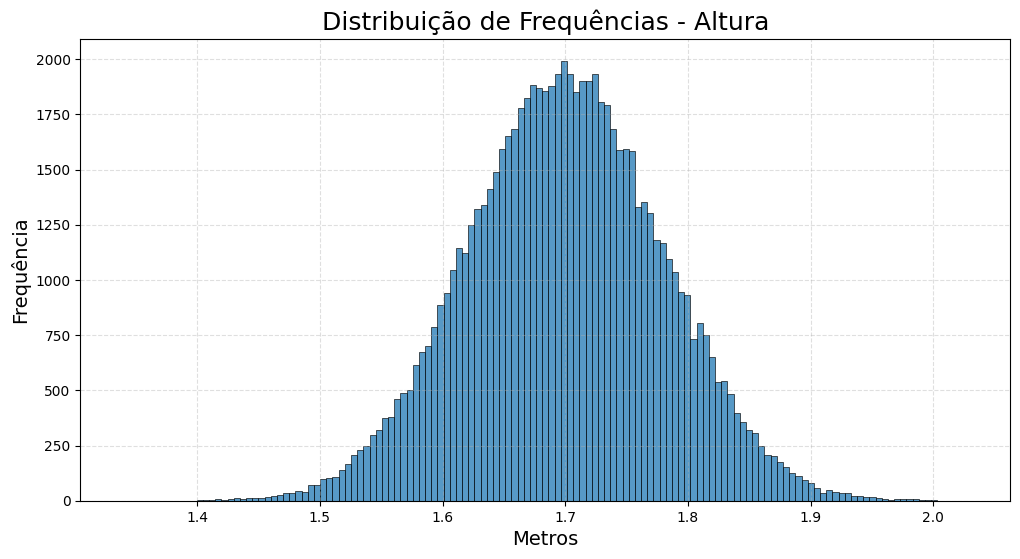

In [128]:
# Seu código de visualização
plt.figure(figsize=(12, 6))
ax = sns.histplot(dados.Altura, kde=False)

# Adiciona as grades nos dois eixos (X e Y) e as deixa mais claras
# ax.grid(axis='both', linestyle='--', alpha=0.4) 
ax.grid(axis='both', linestyle='--', alpha=0.4) 

# Configurações de Título e Rótulos
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)

plt.show()

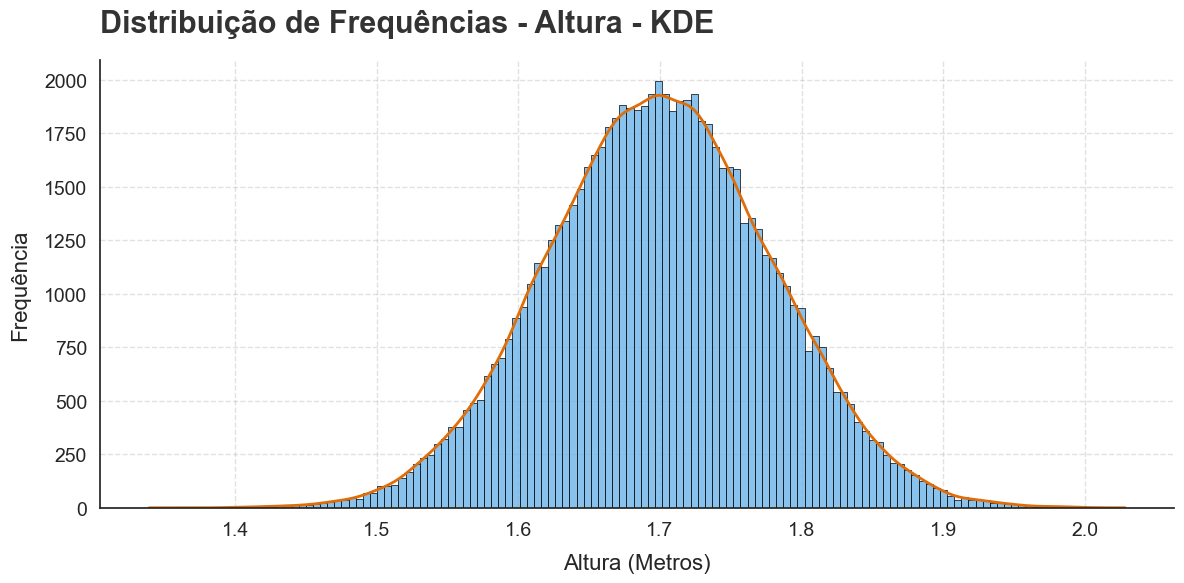

In [174]:
# 1. Aplica um tema limpo do Seaborn para o gráfico
sns.set_theme(style='white') 

# ----------------------------------------------------
# 2. Cria uma nova figura com tamanho personalizado
plt.figure(figsize=(12, 6))

# ----------------------------------------------------
# 3. Plota o histograma com a curva KDE (Kernel Density Estimation)
#    - kde=True: ativa a curva de densidade (KDE) junto com o histograma
#    - color: define a cor das barras do histograma
#    - edgecolor: cor da borda das barras
#    - linewidth: espessura da borda das barras
#    - alpha: transparência das barras
ax = sns.histplot(
    dados.Altura, 
    kde=True,
    color="#6cb5e9",      # Cor azul das barras
    edgecolor='black',      # Bordas pretas
    linewidth=0.5,          # Espessura da borda
    alpha=0.8               # Transparência das barras
)

# ----------------------------------------------------
# 4. Altera a cor e a espessura da linha KDE após o plot
#    - ax.lines: lista de linhas desenhadas no gráfico (a primeira geralmente é a KDE)
#    - set_color: muda a cor da linha
#    - set_linewidth: muda a espessura da linha
for line in ax.lines:
    line.set_color("#df6d0a")  # Cor laranja para a linha KDE
    line.set_linewidth(2)      # Espessura da linha KDE

# ----------------------------------------------------
# 5. Configuração do título e dos rótulos dos eixos
ax.set_title(
    'Distribuição de Frequências - Altura - KDE', 
    fontsize=22, 
    fontweight='bold', 
    color='#333333',   # Cor do título
    loc='left',        # Alinha o título à esquerda
    pad=20             # Espaçamento do título para o gráfico
)
ax.set_xlabel('Altura (Metros)', fontsize=16, labelpad=10)   # Rótulo do eixo X
ax.set_ylabel('Frequência', fontsize=16, labelpad=10)        # Rótulo do eixo Y

# ----------------------------------------------------
# 6. Ajusta o tamanho da fonte dos números nos eixos
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# ----------------------------------------------------
# 7. Remove as bordas superiores e direitas do gráfico para um visual mais limpo
sns.despine(top=True, right=True, left=False, bottom=False) 

# ----------------------------------------------------
# 8. Adiciona uma grade sutil ao fundo do gráfico
ax.grid(
    axis='both', 
    linestyle='--',  
    alpha=0.3,           # Transparência da grade
    color="#9E9E9E"    # Cor da grade
) 

# ----------------------------------------------------
# 9. Ajusta o layout para evitar cortes de elementos
plt.tight_layout()

# ----------------------------------------------------
# 10. Exibe o gráfico
plt.show()

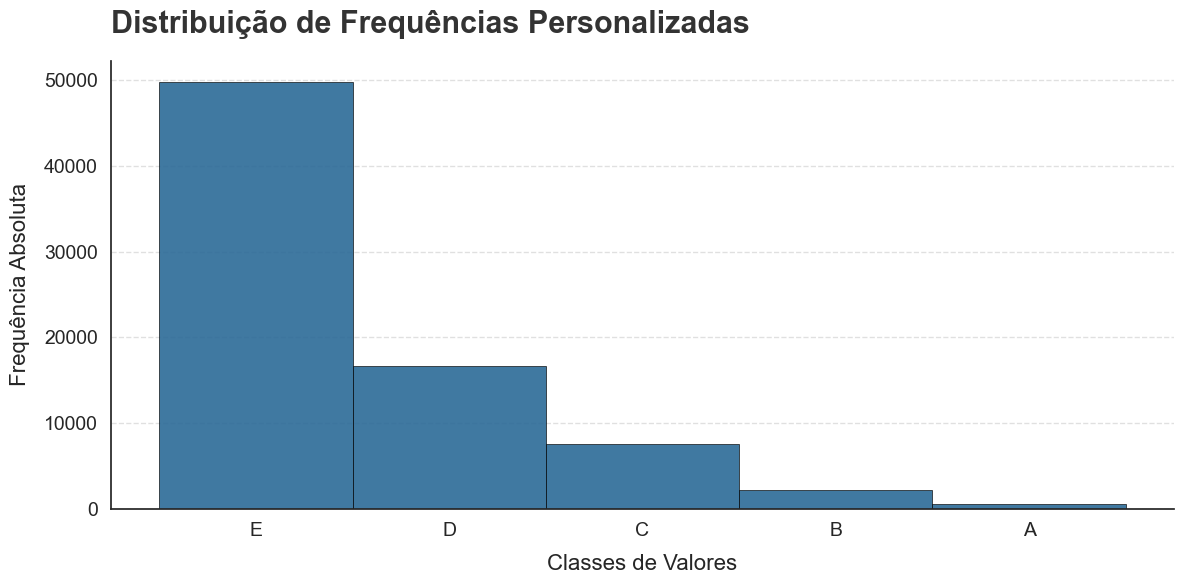

In [172]:
# 1. Configuração do Ambiente
sns.set_theme(style='white') 
plt.figure(figsize=(12, 6))
ax = plt.gca() # Pega o eixo atual

# ----------------------------------------------------
# 2. Plotagem do Pandas (Gráfico de Barras)

# Plotamos a frequência com ajustes de cor e borda
ax = dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(
    ax=ax,
    width=1, 
    color="#2B6A97",         # Cor azul corporativo
    alpha=0.9,               # Aumenta a opacidade para solidez
    edgecolor='black',       # Borda para definir as classes
    linewidth=0.5
)

# ----------------------------------------------------
# 3. Estilização Profissional

# Título e Rótulos (Foco na Narrativa)
ax.set_title(
    'Distribuição de Frequências Personalizadas', 
    fontsize=22, 
    fontweight='bold', 
    color='#333333',
    loc='left',
    pad=20
)
ax.set_xlabel('Classes de Valores', fontsize=16, labelpad=10)
ax.set_ylabel('Frequência Absoluta', fontsize=16, labelpad=10)

# Ajuste do tamanho da fonte dos ticks
plt.xticks(fontsize=14, rotation=0) # Rotação 0 para maior clareza se as labels forem curtas
plt.yticks(fontsize=14)

# ----------------------------------------------------
# 4. Limpeza Visual (Storytelling)

# Remove as bordas desnecessárias
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False) 

# Adiciona a Grade sutil no eixo Y (útil para ler a frequência)
ax.grid(
    axis='y', 
    linestyle='--',  
    alpha=0.3,
    color='#999999'
) 

plt.tight_layout()
plt.show()

# <font color=green>3 MEDIDAS DE TENDÊNCIA CENTRAL</font>
***

## DataFrame de exemplo notas escolares

* Como calcular a medida

In [175]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [ ]:
# Exemplo de como calcular a medida
(8 + 10 + 4 + 8 + 6 + 10 + 8) / 7

7.714285714285714

In [ ]:
# Cálculo da média usando pandas
df['Fulano'].mean()

7.714285714285714

## <font color=green>3.1 Média aritmética</font>
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

Abaixo o como utilizamos no projeto.

In [ ]:
# Cálculo da média da coluna Renda no DataFrame dados:
dados.Renda.mean()

2000.3831988547631

In [ ]:
# Renda média por sexo:
dados.groupby(['Sexo'])['Renda'].mean().round(2)

Sexo
0    2192.44
1    1566.85
Name: Renda, dtype: float64

## <font color=green>3.2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='20%' style="float:left">

In [188]:
# Criando a variavel notas_fulano
notas_fulano = df['Fulano']
# Organizando as notas em ordem crescente:
# Sort_values() organiza os valores em ordem crescente
# Reset_index() reseta o índice para começar do 0 novamente
notas_fulano = notas_fulano.sort_values().reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [190]:

n = notas_fulano.shape[0]
n

7

In [192]:

elemento_md = (n + 1) / 2
elemento_md

4.0

In [194]:

notas_fulano.loc[elemento_md -1]

index     Geografia
Fulano            8
Name: 3, dtype: object

In [ ]:
# Utilizando a função median() do pandas, agora com numeric_only=True para evitar warnings:
notas_fulano.median(numeric_only=True)

Fulano    8.0
dtype: float64

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='20%' style="float:left">

In [211]:
notas_beltrano = df.Beltrano.sample(6, random_state= 101)
notas_beltrano

Matemática    10.0
Inglês         0.5
Física         9.5
História       3.0
Química       10.0
Português      2.0
Name: Beltrano, dtype: float64

In [212]:
notas_beltrano.median()

6.25

### Obtendo a mediana em nosso dataset

In [ ]:
# Para realizarmos a análise descritiva, podemos utilizar o método median() do pandas:
dados.Renda.median()

1200.0

In [ ]:
# Ou podemos utilizar o método quantile() do pandas, passando o valor 0.5 como argumento:
dados.Renda.quantile(0.5)

1200.0

## <font color=green>3.3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

In [213]:

df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [214]:

df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [218]:
exemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 6 ])
exemplo.mode()

0    2
1    4
2    6
dtype: int64

### Obtendo a moda em nosso dataset

In [220]:

dados.Renda.mode()

0    788
Name: Renda, dtype: int64

In [ ]:

dados.Altura.mode().round(2)

0    1.57
1    1.67
2    1.68
3    1.69
4    1.71
5    1.71
6    1.75
7    1.78
8    1.80
Name: Altura, dtype: float64

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='60%'>

### Avaliando a variável RENDA

C:\Users\User\AppData\Local\Temp\ipykernel_14796\2643500630.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Renda)


<Axes: xlabel='Renda', ylabel='Density'>

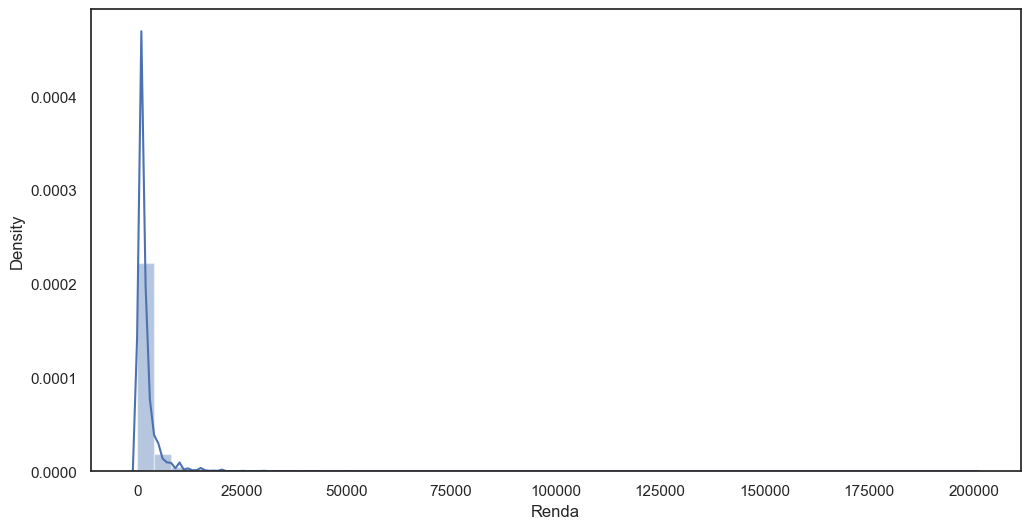

In [248]:
# Código novo e recomendado
ax = sns.distplot(dados.Renda)
ax.figure.set_size_inches(12, 6)
ax

C:\Users\User\AppData\Local\Temp\ipykernel_14796\2591294308.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000').Renda)


<Axes: xlabel='Renda', ylabel='Density'>

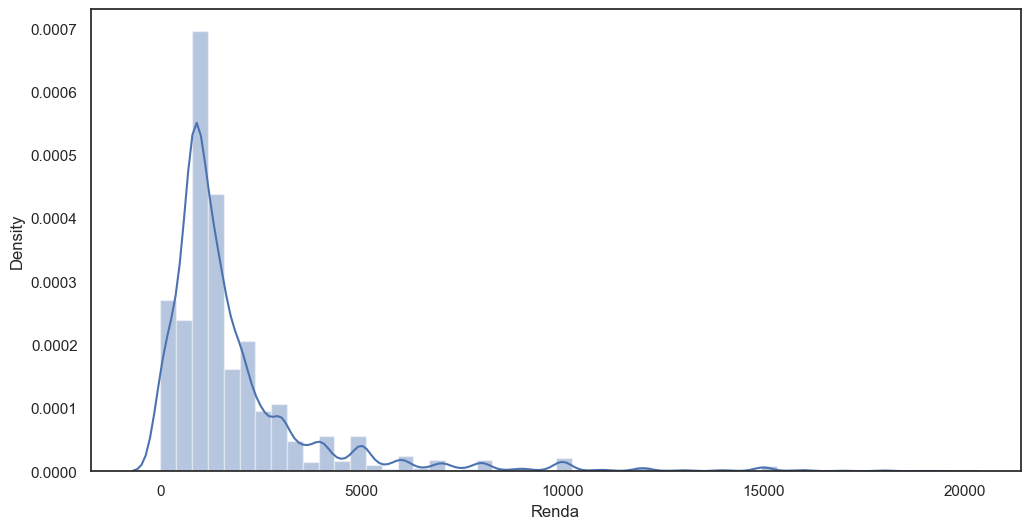

In [249]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

In [250]:
Moda = dados.Renda.mode()[0]
Moda

788

In [251]:
Mediana = dados.Renda.median()
Mediana

1200.0

In [252]:
Media = dados.Renda.mean()
Media

2000.3831988547631

***

### Avaliando a variável ALTURA

C:\Users\User\AppData\Local\Temp\ipykernel_14796\1709077983.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


<Axes: xlabel='Altura', ylabel='Density'>

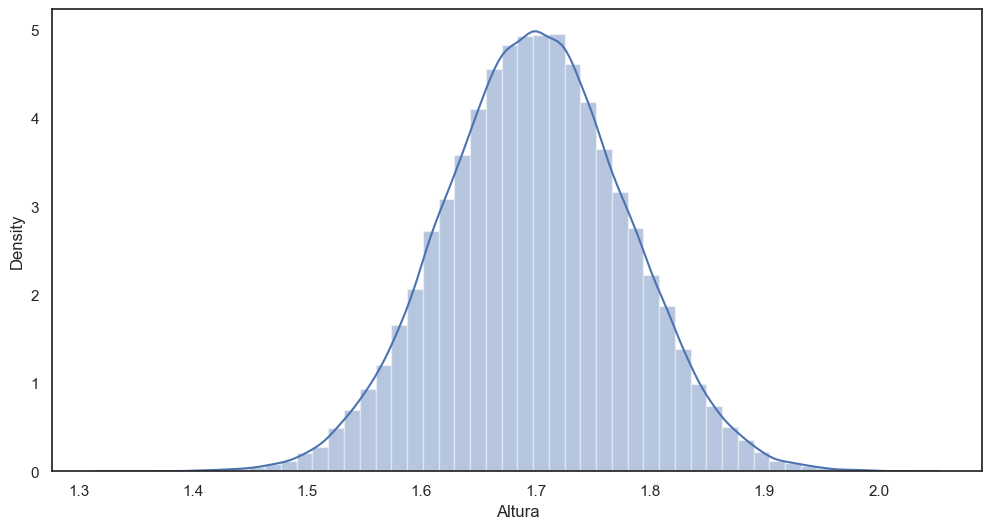

In [253]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax

In [269]:
Moda = dados.Altura.mode().round(2)
Moda

0    1.57
1    1.67
2    1.68
3    1.69
4    1.71
5    1.71
6    1.75
7    1.78
8    1.80
Name: Altura, dtype: float64

In [274]:
Mediana = dados.Altura.median()
Mediana

1.6993247325

In [270]:
Media = dados.Altura.mean()
Media

1.6995124540575741

***

### Avaliando a variável ANOS DE ESTUDO

C:\Users\User\AppData\Local\Temp\ipykernel_14796\3796205625.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Anos de Estudo'], bins = 17)


<Axes: xlabel='Anos de Estudo', ylabel='Density'>

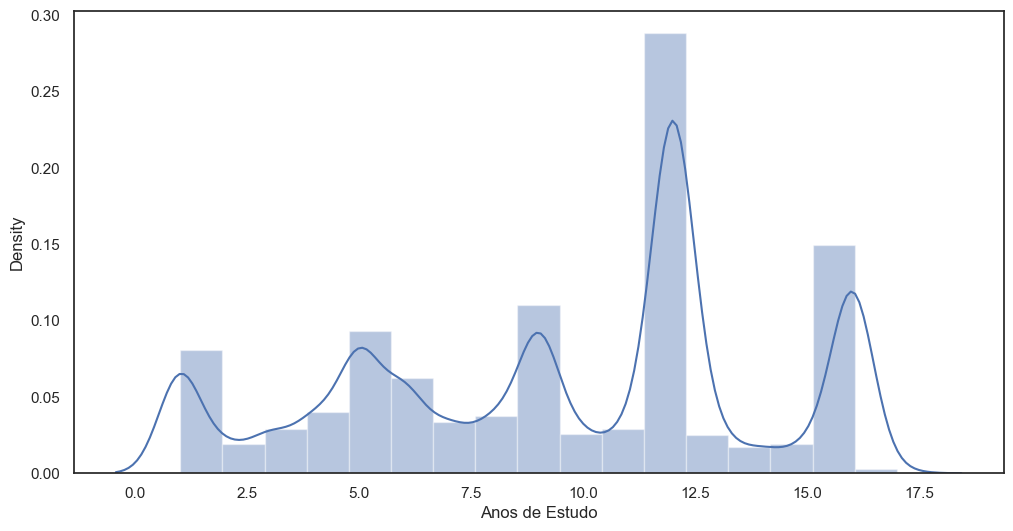

In [276]:
ax = sns.distplot(dados['Anos de Estudo'], bins = 17)
ax.figure.set_size_inches(12, 6)
ax

In [277]:
Moda = dados['Anos de Estudo'].mode()
Moda

0    12
Name: Anos de Estudo, dtype: int64

In [278]:
Mediana = dados['Anos de Estudo'].median()
Mediana

11.0

In [279]:
Media = dados['Anos de Estudo'].mean()
Media

9.469664237376367

# <font color=green>4 MEDIDAS SEPARATRIZES</font>
***

## <font color=green>4.1 Quartis, decis e percentis</font>
***

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

## <font color=green>4.2 Box-plot</font>
***

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='20%'>

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='30%'>

# <font color=green>5 MEDIDAS DE DISPERSÃO</font>
***

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

## <font color=green>5.1 Desvio médio absoluto</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


## <font color=green>5.2 Variância</font>
***

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

## <font color=green>5.3 Desvio padrão</font>
***

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

## Desvio padrão amostral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$